# Dimensionality reduction techniques

In this notebook we will present some of the most important techniques of dimensionality analysis. We will show how to perform Principal component analysis (PCA), t-SNE, UMAP and autoencoders. The theoretical foundaing of this techniques can be found on the lecture notes. We will test these methods with already pre-build dataset of scikit.

### Import all the naccesary packages

If you get an error saying that some package does not exist you can install it running: !pip install "package_name" in one cell.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine, load_digits
from umap import UMAP
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
from tqdm import tqdm

## Plot the three data bases that we are going to use

We are going to use three data bases: iris, wine and digits. In here we present the details of each of them.

### Iris

This data base contains infromation about 3 different type of flowers, classified as 0, 1 and 2 by the target flag. In the following cell of code we will load the data, show its feautures and plot them. We can see that each of the flower has four features:
- Sepal length
- Sepald width
- Petal length
- Petal width

Thus, in the notation that we have presented in class, the data matrix will be in $\mathbb{R}^{150,4}$, with $150$ being the number of measures and $4$ the number of features


DataFrame Info:


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

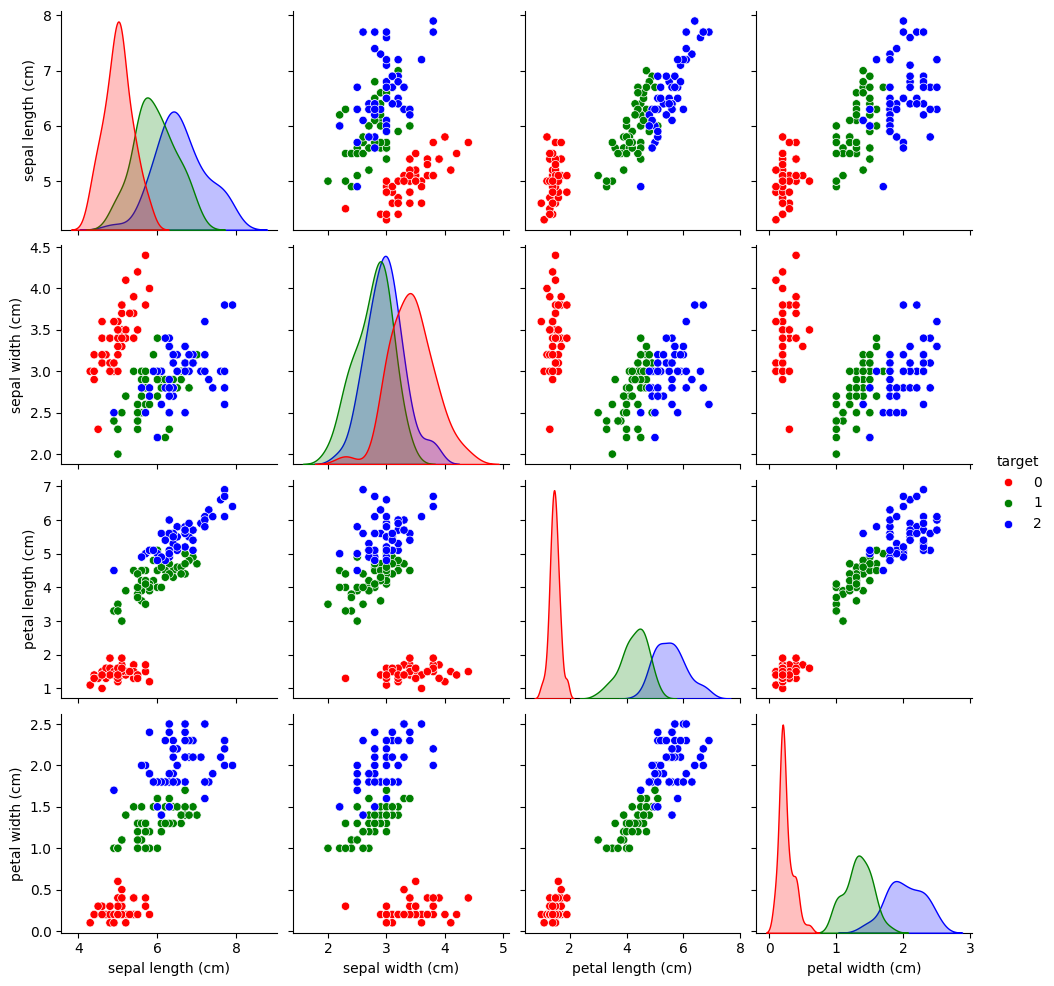

In [2]:
# Load iris dataset and print all the important infromation #
data = load_iris()
X = data.data
y = data.target

# Display comprehensive dataframe info
print("\nDataFrame Info:")
df_iris = pd.DataFrame(X, columns=data.feature_names)
df_iris['target'] = y
display(df_iris.describe())

# Do an snset pairplot to visualize the data #
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
# use 'palette' instead of the unsupported 'colors' argument
sns.pairplot(df, hue='target', palette=['red', 'green', 'blue'])

### Wine dataset

We will now load the wine dataset. This data set contains 13 properties of 178 different wines. These are clasified into three different kinds. This dataset will be similar to the previous one, but it contains more features. Then, the data matrix will be $X \in \mathbb{R}^{178,13}$.

(178, 13)

DataFrame Info:


alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

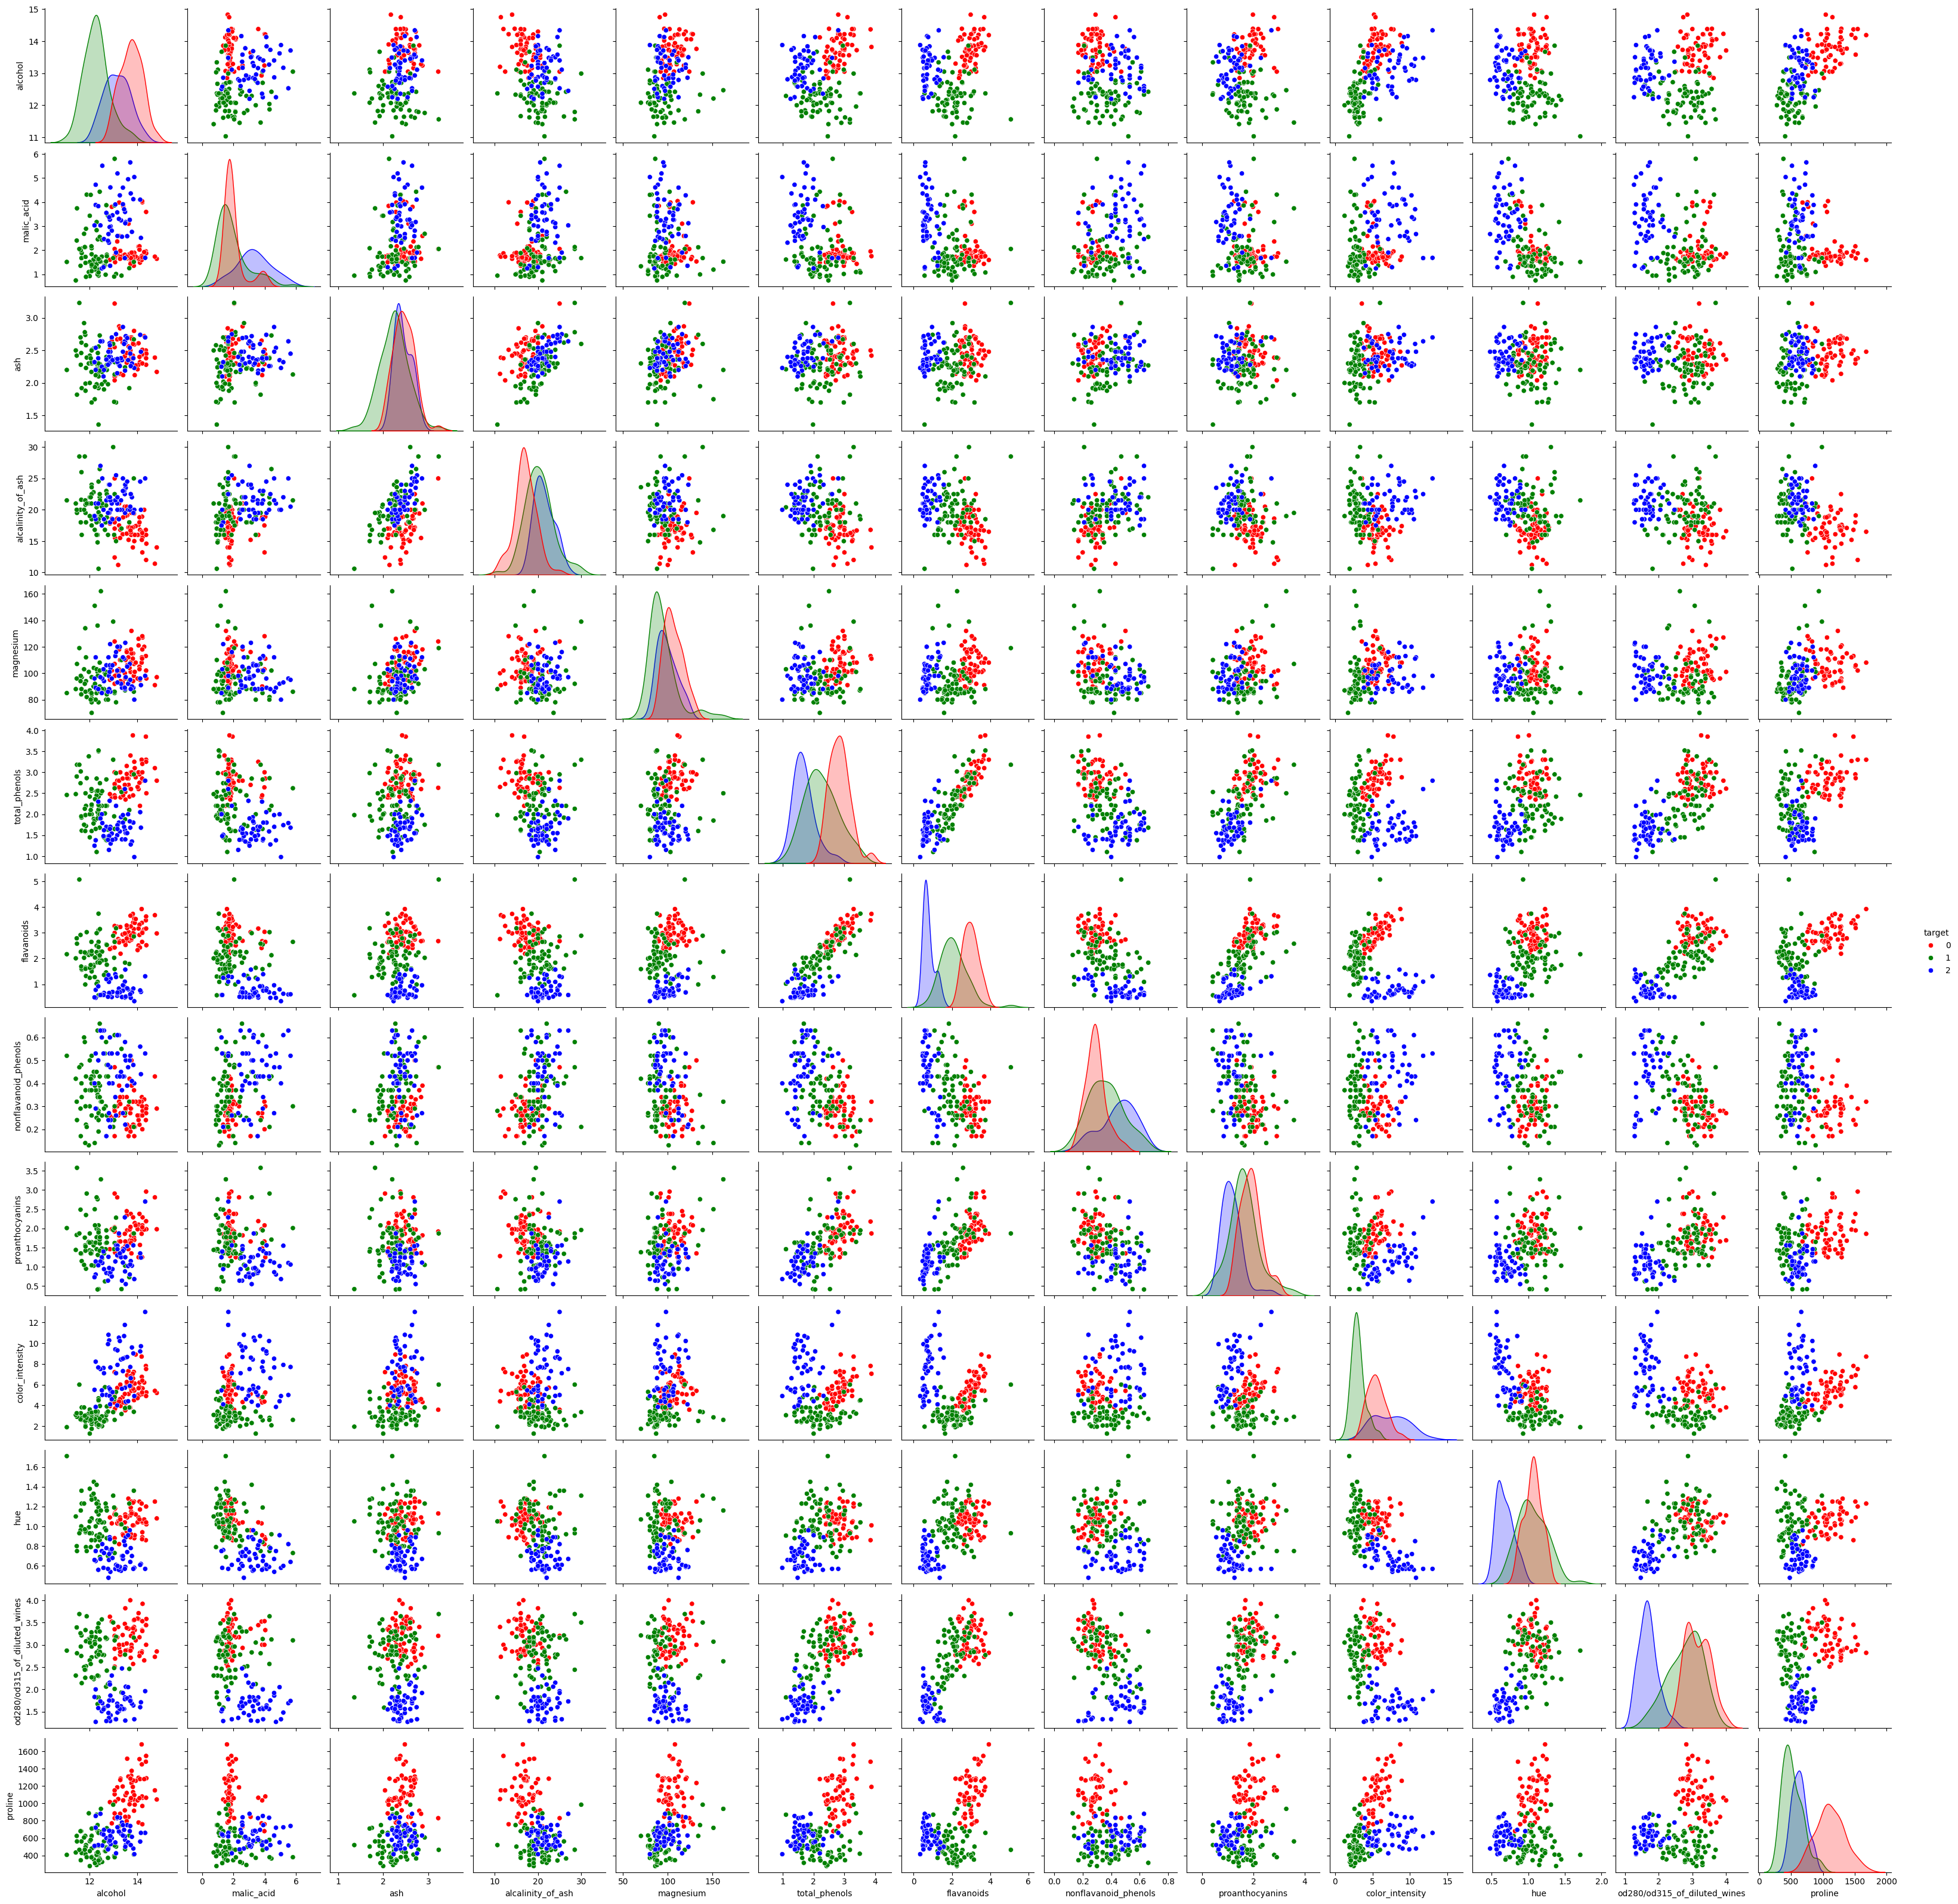

In [25]:
# Load wine dataset and print all the important infromation #
data = load_wine()
X = data.data
print(X.shape)
y = data.target

# Display comprehensive dataframe info
print("\nDataFrame Info:")
df_wine = pd.DataFrame(X, columns=data.feature_names)
df_wine['target'] = y
display(df_wine.describe())

# Do an snset pairplot to visualize the data #
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
# use 'palette' instead of the unsupported 'colors' argument
sns.pairplot(df, hue='target', palette=['red', 'green', 'blue'])

### Digits data set

We will present here the digits dataset. These correspond to 1797 handwritten digits between 0 and 9. These are written on a grid of 8x8. Then, the data will show the intensity of each pixel (on a scale from 0 to 16). In our language, we have 1797 number of samples with $64$ feature each. Then, the data matrix will be $X\in \mathbb{R}^{1797,64}$

(1797, 64)

DataFrame Info:


pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

         pixel_6_7    pixel_7_0    pixel_7_1    pixel_7_2    pixel_7_3  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.206455     0.000556     0.279354     5.557596    12.089037   
std       0.984401     0.023590     0.934302     5.103019     4.374694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000    11.000000   
50%       0.000000     0.000000     0.000000     4.000000    13.000000   
75%       0.000000     0.000000     0.000000    10.000000    16.000000   
max      13.000000     1.000000     9.000000    16.000000    16.000000   

         pixel_7_4    pixel_7_5    pixel_7_6    pixel_7_7       target  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     11.809126     6.764051     2.067891     0.364496     4.490818  
std       4.933947     5.900623     4.090548     1.860122     2.865304  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      10.000000     0.000000     0.000000     0.000000     2.000000  
50%      14.000000     6.000000     0.000000     0.000000     4.000000  
75%      16.000000    12.000000     2.000000     0.000000     7.000000  
max      16.000000    16.000000    16.000000    16.000000     9.000000  

[8 rows x 65 columns]

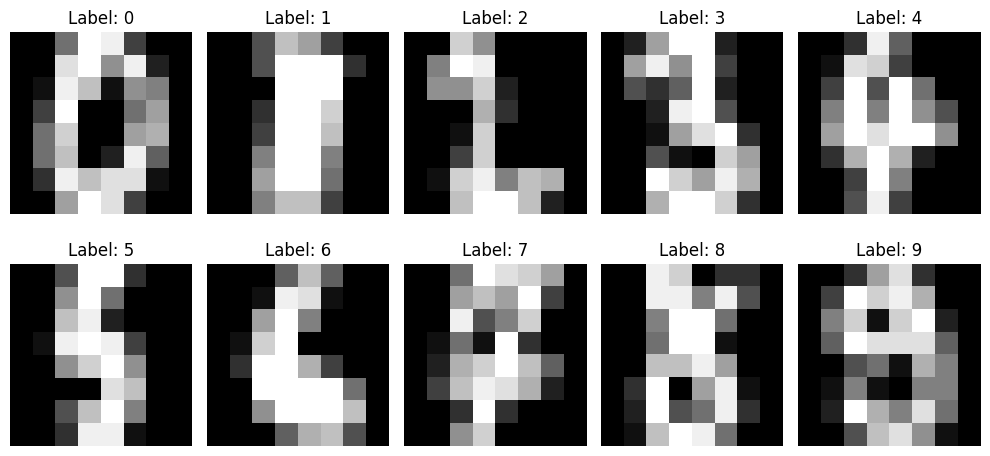

In [26]:
# Load digits dataset and print all the important infromation #
data = load_digits()
X = data.data
print(X.shape)
y = data.target

# Display comprehensive dataframe info
print("\nDataFrame Info:")
df_wine = pd.DataFrame(X, columns=data.feature_names)
df_wine['target'] = y
display(df_wine.describe())

# Do an imshow of some digits to visualize the data #
# Show one random image for each digit (0-9)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for digit, ax in enumerate(axes.flat):
    indices = np.where(y == digit)[0]
    idx = np.random.choice(indices)
    ax.imshow(X[idx].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {digit}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Principal component analysis

### Example

We first present a Principal Component Analysis on a dataset. In particular, we will test this method with the first dataset since it is the simplest one. As it is explained on the lectures notes, PCA will find the directions along which the eigenvalues of the covariance matrix of data are the largest. We will identify this components as the principal directions.

Since we will use the iris dataset, we will perform a dimensionality reducition from $4$ to $2$ features. The first setp of the dimensionality reduction will be to load the dataset and standardize it, this is, rescale and shift the data such that each feature has mean $0$ and standard deviation $1$. This can be done by the already built-in function $\texttt{StandardScaler}$.

In [33]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We now perform the PCA of the data. For this purpose we will use the function $\texttt{PCA}$, which input is going to be the data matrix. We then plot the transformed data along the two most dominant components. We do this plot in a 2,2 grid, using as color coding the value of the features. We can see here that we can approx. identify PCA1 with petal length, and PCA2 with sepal widht (but this is not as clear as the first one). 

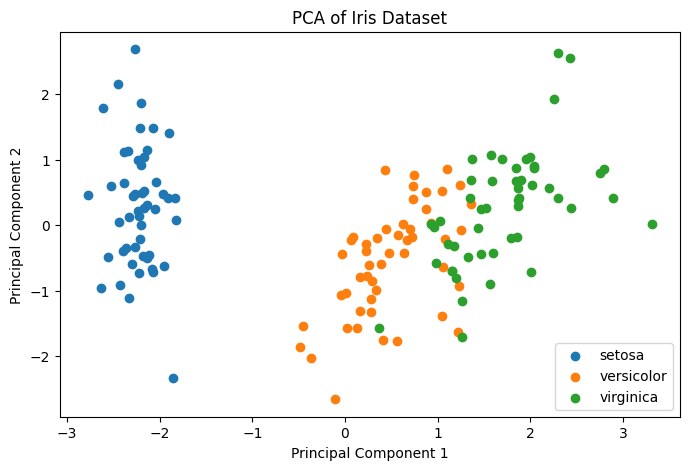

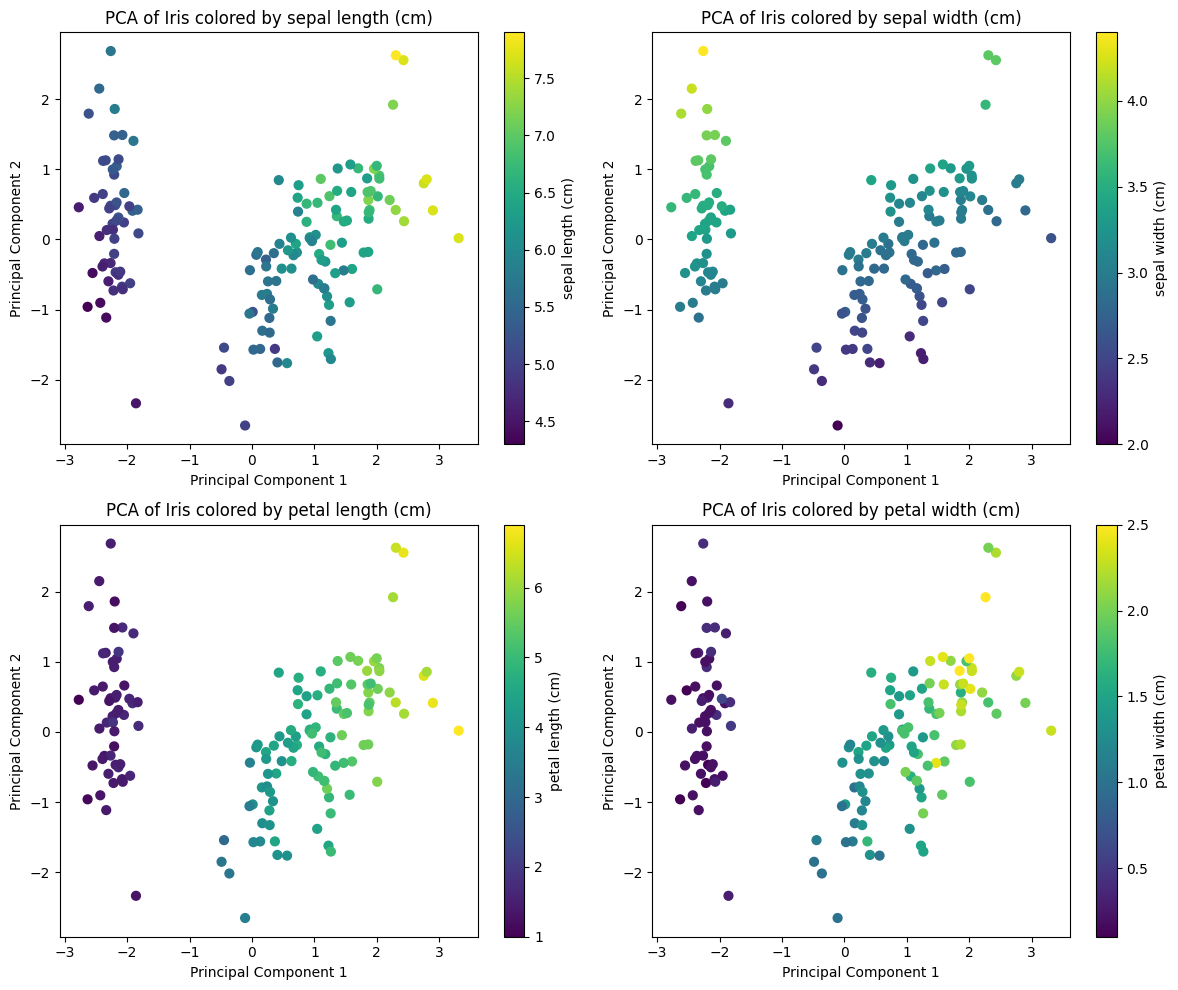

In [35]:
# Apply PCA (2 components) for the scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the reduced data
plt.figure(figsize=(8, 5))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

# 2x2 scatter plots of PCA components colored by each iris feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = data.feature_names  # sepal length, sepal width, petal length, petal width

for ax, i in zip(axes.flat, range(X.shape[1])):
    sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=X[:, i], cmap='viridis', s=40)
    ax.set_title(f'PCA of Iris colored by {features[i]}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(features[i])

plt.tight_layout()
plt.show()


At last we show the value of the eigenvalues of the covariance matrix. We can see that we can explain up to $90\%$ of the original data using just two components of the PCA. These two components seem to be a mixture between petal information (for the first one) and sepal information (for the second)

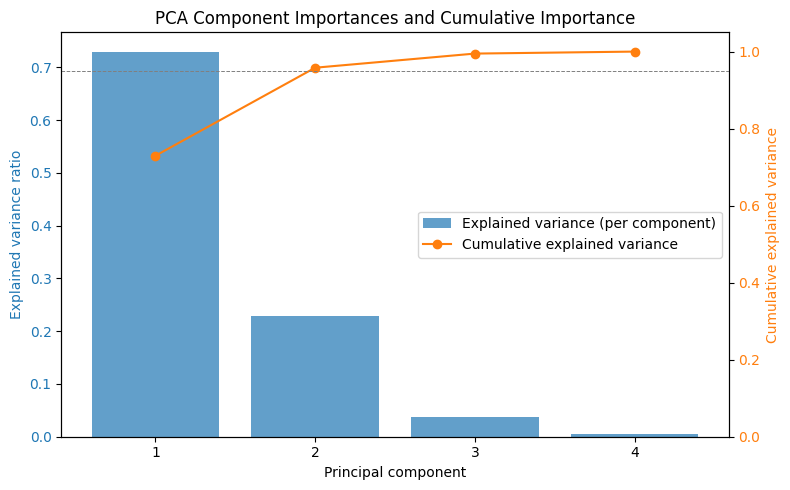

In [36]:
# Fit PCA with all components to get explained variance ratios
pca_full = PCA().fit(X_scaled)
ratios = pca_full.explained_variance_ratio_
cum_ratios = np.cumsum(ratios)
components = np.arange(1, len(ratios) + 1)

# Plot histogram (bar) of individual explained variance and cumulative importance (line)
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(components, ratios, alpha=0.7, color='C0', label='Explained variance (per component)')
ax1.set_xlabel('Principal component')
ax1.set_ylabel('Explained variance ratio', color='C0')
ax1.set_xticks(components)
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()
ax2.plot(components, cum_ratios, color='C1', marker='o', label='Cumulative explained variance')
ax2.set_ylabel('Cumulative explained variance', color='C1')
ax2.set_ylim(0, 1.05)
ax2.tick_params(axis='y', labelcolor='C1')

# optional guideline and combined legend
ax2.axhline(0.95, color='gray', linestyle='--', linewidth=0.7)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,loc='center right')

plt.title('PCA Component Importances and Cumulative Importance')
plt.tight_layout()
plt.show()

### Try it yourself!

In [1]:
# Perform the same PCA analysis using another dataset #
# You can use wine, digits or whatever you like #
# Compare your results with the ones obtained for the iris dataset #
# Load dataset


# Standardize the data


# Apply PCA (2 components) for the scatter plot


# Plot the reduced data


# 2x2 scatter plots of PCA components colored by each wine feature


# Fit PCA with all components to get explained variance ratios


# Plot histogram (bar) of individual explained variance and cumulative importance (line)




# optional guideline and combined legend



## t-SNE

### Example

We will now explain how to perform a dimensionality reduction using t-SNE. We will also compare the results with the ones obtained for the PCA. As we have written in the lecture notes, t-SNE is a non-linear dimensionality reduction techinque. This technique is built such that it will preserve the local structure of the data. This means that points that are closer in the $d$ dimensional data space, will remain closer in the reduced $m$ dimensional space.

We will test out this technique with the wine data base. This data set contains 13 properties of 178 different wines, that are classified into three types. The first step will be to load the data set and standarize it.

In [14]:
# Load dataset
data = load_wine()
X = data.data
print(X.shape)
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(178, 13)


Then, we use the built-in function $\texttt{TSNE}$ to reduce the $13$ components to $2$. Note that TSNE will take an additional argument called the perplexity. The intuition behind this parameter is that the smaller it is, the closes each point will look for neighbors in the $d$ dimensional space. We will fix it to $25$.

We then plot the reduced components of the data. We can see that the local structure (similar wines are closer) is preserved. Since there are a lot features and t-SNE is a non-linear dimensionality reduction technique it is difficult to say which initial features will correspond to the reduced directions.

(178, 13)


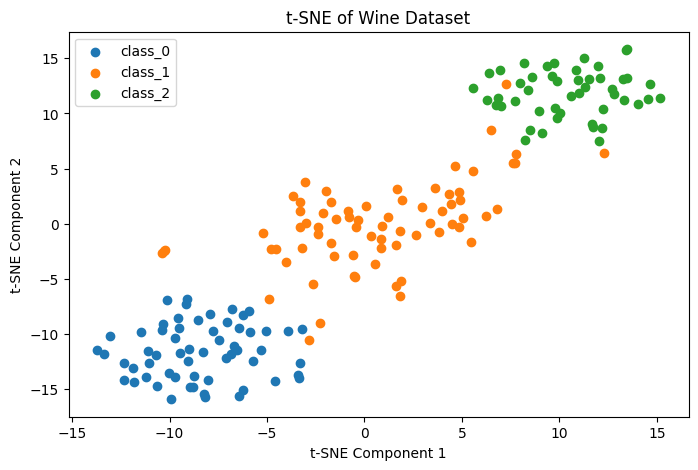

In [ ]:

# Apply t-SNE for the scatter plot #
tsne = TSNE(n_components=2, perplexity=25)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the reduced data
plt.figure(figsize=(8, 5))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=target_name)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Wine Dataset')
plt.legend()
plt.show()


### Try it yourself

Try applying tSNE to both iris and digits dataset. Comment the results. Compare tSNE with PCA in the case of iris dataset. Try changin the perplexity. What happens?

In [2]:
# Try using tsne for the digits dataset #
# Load dataset


# Standardize the data

# Apply t-SNE for the scatter plot #


# Plot the reduced data



In [3]:
# Try using tsne for the digits dataset #
# Load dataset


# Standardize the data


# Apply t-SNE for the scatter plot #


# Plot the reduced data


## UMAP

### Example

UMAP is very similar to tSNE. The main difference is that tSNE will only care about local structure of data. However, UMAP will also try to preserve some global features. We will test out this technique usnig the digits data set. We first load the data

In [28]:
# Load dataset
data = load_digits()
X = data.data
print(X.shape)
y = data.target
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(1797, 64)


In this dataset we have $1797$ hand-written numbers. Each of them is represented as an image of $8\times 8$ pixels. Thus, we can interpret these pixels as different features of the data, being the number of features $64$. To apply UMAP and reduce the components from $64$ to $2$ we use the prebuilt function $\texttt{UMAP}$. This will take as inputs the number of components, the minimum distance between points in the embedding and the number of local neighbors. By increasing the minimum distance parameter we will generate a less clustered embedding of the data. On the other hand, by increasing the number of neighbors we will be focusing on more global structures of the manifold than on local ones. 

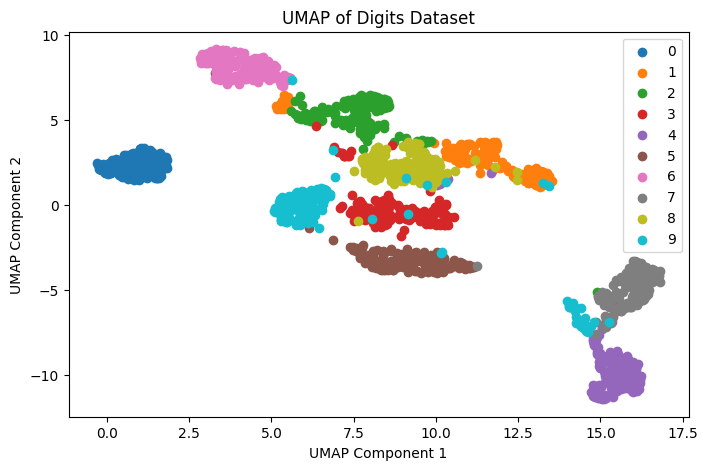

In [35]:

# Apply UMAP for the scatter plot #
reducer = UMAP(n_neighbors=15, min_dist=0.25, n_components=2)
X_umap = reducer.fit_transform(X_scaled)

# Plot the reduced data
plt.figure(figsize=(8, 5))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_umap[y == i, 0], X_umap[y == i, 1], label=target_name)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Digits Dataset')
plt.legend()
plt.show()


We cann see from here than the clustering is done extremely well, where there is very good agreement on the clusters with the internal tags that the data points have.

### Try it yourself!

In [4]:
# Change the values of the number of neighbors and minimum distance to see how the embedding
# would change
# Load dataset

# Standardize the data


# Different values for local neighbors and minimum distance #


# Do a grid of plots 3x3 with the different combinations


In [5]:
# Apply UMAP to the iris and wine data sets #
# Compare the results with tSNE and PCA #

# Do a 3,3 subplot grid doing PCA, tSNE and UMAP for the three datasets #


## Autoenconders

At last we present a different way of performing a dimensionality reduction using autoenconders. These are machine learning tool with the following architecture:

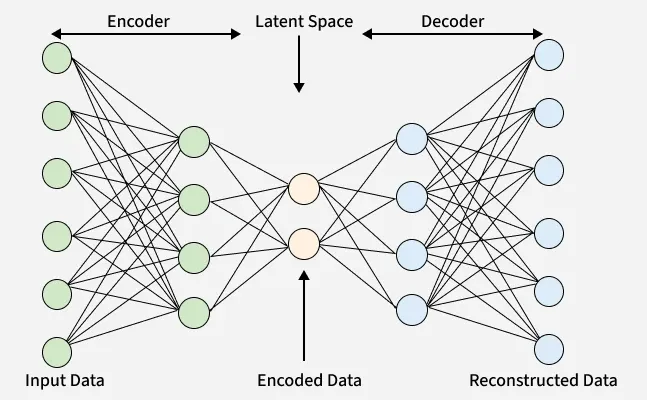

These are composed by two parts: the enconder and the decoder. The encoder will reduce the dimensionality from $d$ to $m$. Then, the decoder will increase the dimensionality from $m$ to the original dimensionality $d$. When training autoencoders to perform dimensionality reduction we want the encoder to compress as much as possible the information. On the other hand, we want the decoder to recover the original data just from the latent space information. It is for this reason that we are going to defined the loss function of this model as the Mean Square Error (MSE) when comparing the recovered data to the original one

In the following cell we define the autoencoder model. We are using SiLU as our activation function (we need something that is very non linear). On the other hand, the output layer activation function will be a sigmoid, since we are going to normalize our data to be in between $0$ and $1$. We plot both activation functions down below.

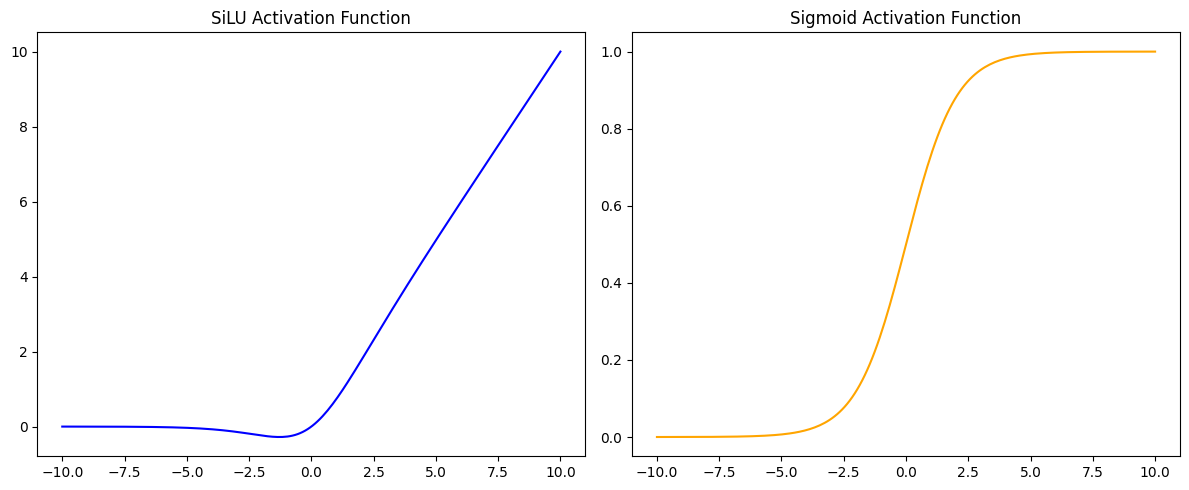

In [38]:
# Plots of the SiLU and sigmoid activation functions #
x = np.linspace(-10, 10, 200)
silu = x / (1 + np.exp(-x))
sigmoid = 1 / (1 + np.exp(-x))
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(x, silu, color='blue')
ax[0].set_title('SiLU Activation Function')
ax[1].plot(x, sigmoid, color='orange')
ax[1].set_title('Sigmoid Activation Function')
plt.tight_layout()
plt.show()

Definition of the autoenconder:

In [48]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.SiLU(),
            nn.Linear(256, 128),
            nn.SiLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.SiLU(),
            nn.Linear(128, 256),
            nn.SiLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent


We now define the trainig loop. As we have already mentioned, we will define the loss function to be the MSE error between the real and the reconstructed data. We will also use a learning rate scheduler that will reduce the learning rate when there is no improvement in the loss function.

In [56]:
# Define the training loop #
def train_autoencoder(model, data, epochs=100, batch_size=32, learning_rate=0.001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    dataset = TensorDataset(torch.tensor(data, dtype=torch.float32))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    # Reduce on plateau
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)
    loss_dict = {'epoch': [], 'loss': []}    
    for epoch in tqdm(range(epochs), desc="Training"):
        for batch in dataloader:
            inputs = batch[0]
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 10 == 0:
            loss_dict['epoch'].append(epoch + 1)
            loss_dict['loss'].append(loss.item())
        scheduler.step(loss)
    return loss_dict


With all these we have the necessary tools to get our latent space. We will test out the autoencoder with the digits dataset. The first step will be to load the data and rescale it. Note that in here we will use a $\texttt{MinMaxScaler}$. This function will normalize the data to be in between $0$ and $1$. This change is important since, as we have already seen in the PINNs lectures, Neural Networks like order $1$ inputs. 

In [57]:

data = load_digits()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # now in [0,1]

input_dim = X_scaled.shape[1]
latent_dim = 2

autoencoder = Autoencoder(input_dim, latent_dim)



We now define the autoencoder and train it for $5000$ epochs. You can change this number but take into account that the more epochs we train the model the better it will be reconstructing the original data.

In [58]:
autoencoder = Autoencoder(input_dim, latent_dim)

# Train the autoencoder
loss_dict = train_autoencoder(autoencoder, X_scaled, epochs=5000,
                              batch_size=X_scaled.shape[0],
                              learning_rate=0.01)

Training: 100%|██████████| 5000/5000 [01:33<00:00, 53.25it/s]


A key element when talking about machine learning is the loss function. In the next cell we will plot it as a function of the epoch. A good sign of convergence is when the loss flattens as we keep training the model. At this point the Neural Network can not be better at making a prediction, and we are limited by the architecture that we have chose

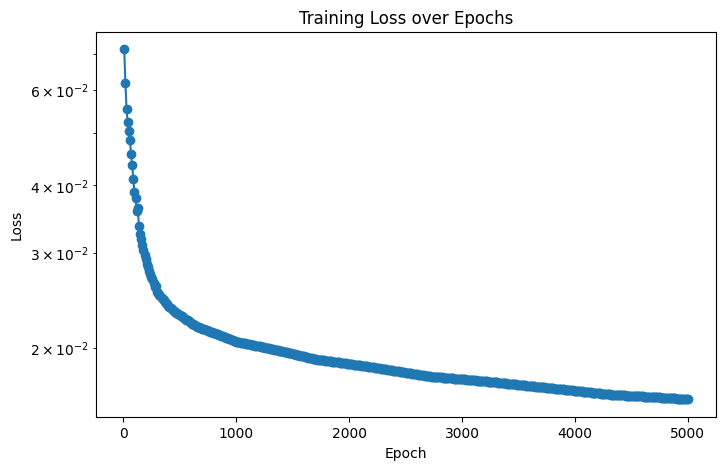

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(loss_dict['epoch'], loss_dict['loss'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Training Loss over Epochs')
plt.show()

We know plot the actual data in the top row and the actual predicition in the bottom for each of the digits on the data set. We can see that the match is pretty good!

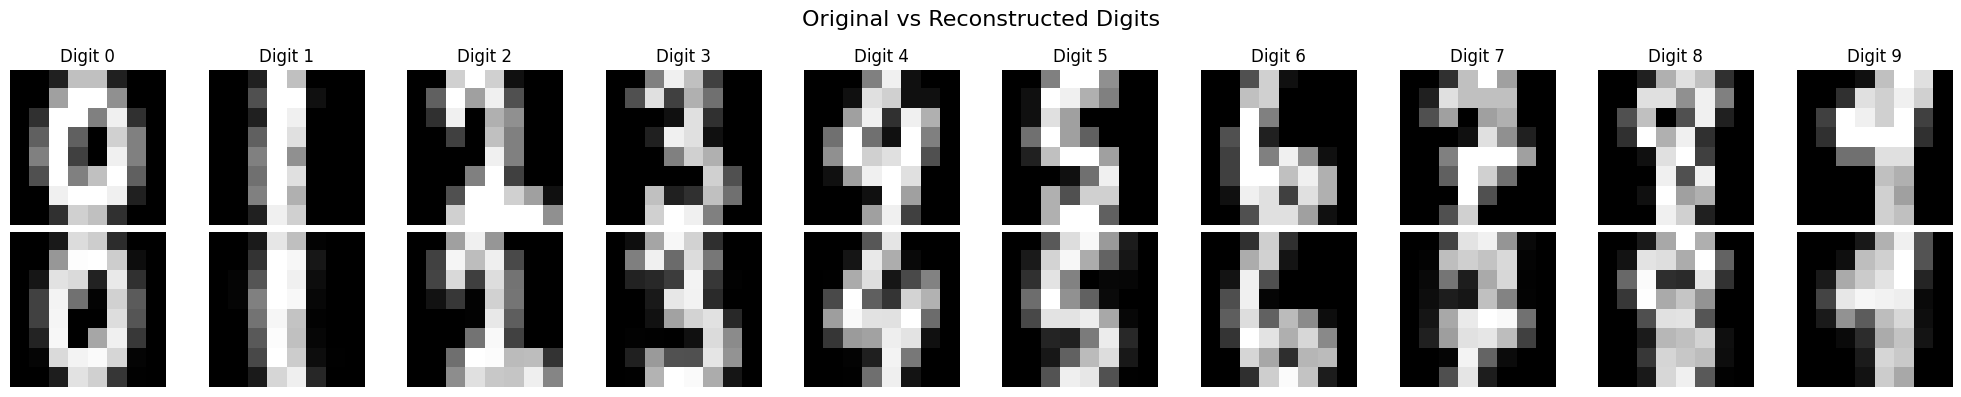

In [60]:
num_digits = 10
plt.figure(figsize=(20, 4))

for digit in range(num_digits):
    indices = np.where(y == digit)[0]
    idx = np.random.choice(indices, 1)

    original_image = X[idx]

    # Encode + Decode
    with torch.no_grad():
        X_input = torch.tensor(scaler.transform(original_image), dtype=torch.float32)
        reconstructed, _ = autoencoder(X_input)
        reconstructed = reconstructed.numpy()

    # Undo scaling!
    reconstructed = scaler.inverse_transform(reconstructed)

    # Plot original
    plt.subplot(2, num_digits, digit + 1)
    plt.imshow(original_image[0].reshape(8, 8), cmap='gray')
    plt.axis('off')
    if digit == 0:
        plt.ylabel("Original", fontsize=12)
    plt.title(f"Digit {digit}")

    # Plot reconstructed
    plt.subplot(2, num_digits, digit + 1 + num_digits)
    plt.imshow(reconstructed[0].reshape(8, 8), cmap='gray')
    plt.axis('off')
    if digit == 0:
        plt.ylabel("Reconstructed", fontsize=12)

plt.suptitle("Original vs Reconstructed Digits", fontsize=16)
plt.tight_layout()
plt.show()

At last we show the latent space components that the autoenconder is giving us. At first sight one might thinkg that the autoenconder is doing worse than tSNE or UMAP. Howeer, it is kind of clustering similar points together and placing then on approximately strainght lines. For a better visualization one can perform additional reduction techniques to this latent space components, as PCA, tsNE or UMAP.

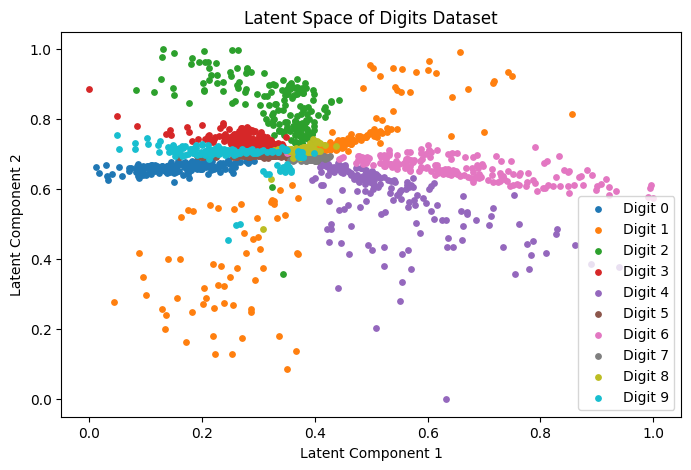

In [62]:
with torch.no_grad():
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    _, X_latent = autoencoder(X_tensor)
    X_latent = X_latent.numpy()

# Normalize latent space to [0, 1]
scaler_latent = MinMaxScaler()
X_latent_scaled = scaler_latent.fit_transform(X_latent)

plt.figure(figsize=(8, 5))
for i in np.unique(y):
    plt.scatter(X_latent_scaled[y == i, 0], X_latent_scaled[y == i, 1], label=f"Digit {i}", s=15)
plt.xlabel('Latent Component 1')
plt.ylabel('Latent Component 2')
plt.title('Latent Space of Digits Dataset')
plt.legend()
plt.show()


# AI disclaimer 

This notebook has been prepared with the help of chatGPT, Claude and copilot. These tools has been used mainly to debug code and prepare the plots on the desired format